# Checkpoint 14: Lepton energy reconstruction in water Cerenkov detectors - NN Regression and Gradient Boosted Regression Tree

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Exercise 1:

In [2]:
sns.set_theme()

In [3]:
df = pd.read_csv('numu_energy_studies.csv', index_col=0)
df.head()

,i,neutrinoE,trueKE,recoE_lookup,total_PMTs_hits2,total_hits2,total_ring_PEs2,pot_length2,hits_pot_length2,recoDWallR2,recoDWallZ2,lambda_max_2,recoDWall_2,recoToWall_2,vtxTrackBias_2
0,0,664.541,236.327,22.35380,0.000000,0.023325,0.00000,0.662787,0.003754,0.003389,0.458415,0.650854,0.003389,0.220977,-0.011905
1,3,400.551,186.765,2.46971,0.000000,0.010075,0.00000,0.662787,0.001621,0.003389,0.458415,0.405903,0.003389,0.220977,-2.269040
2,4,633.353,448.481,409.95400,0.308444,0.080400,0.13070,0.531171,0.016146,0.035389,0.753969,0.537975,0.035389,0.494926,0.024453
3,7,845.921,586.647,37.83740,0.000000,0.011950,0.00000,0.918554,0.001388,0.042498,0.083664,0.830098,0.042498,0.805578,-0.007114
4,9,1323.140,963.822,1408.07000,0.111333,0.142300,0.26265,0.093641,0.162093,0.616305,0.164307,0.092105,0.358487,0.135845,-0.004307


In [4]:
len(df.index)

166186

In [5]:
df.dropna(inplace=True)
len(df.index)

163592

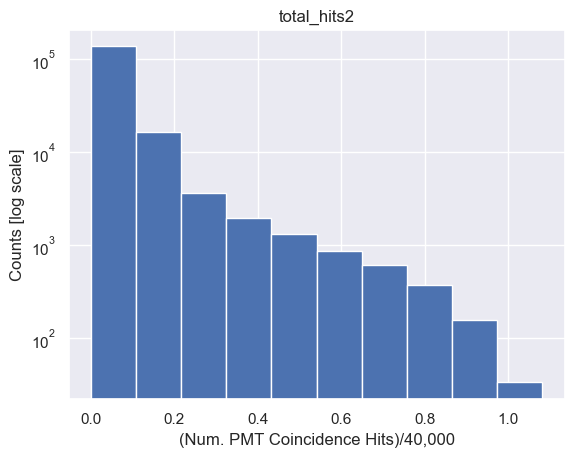

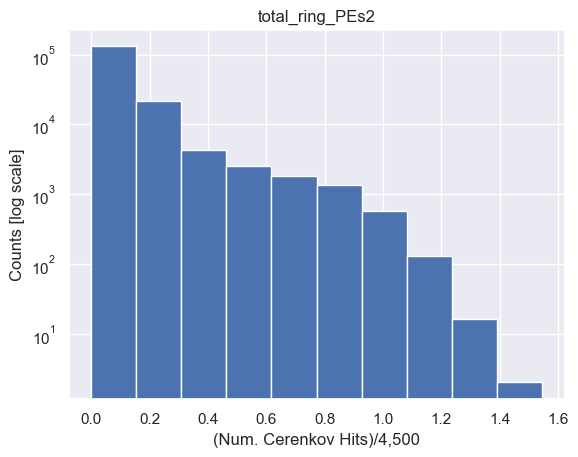

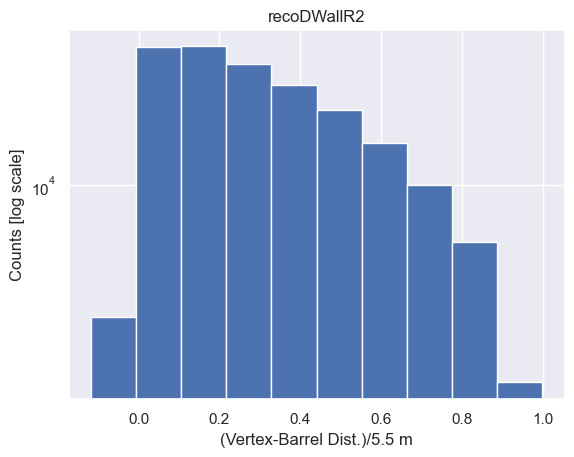

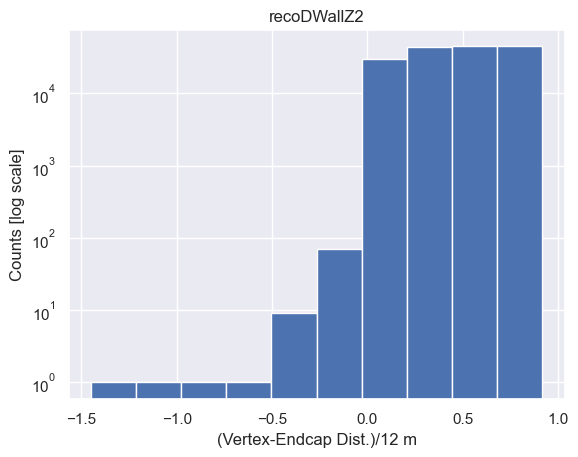

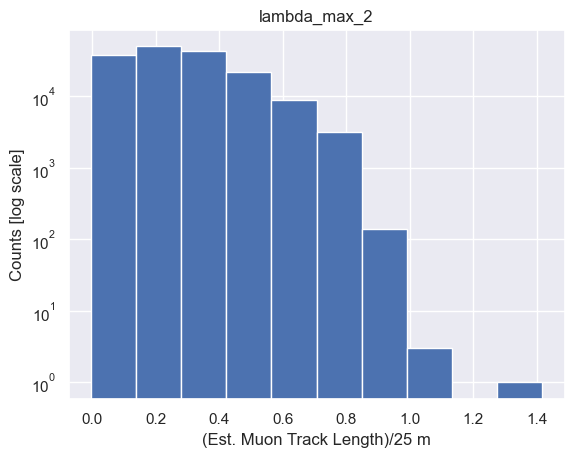

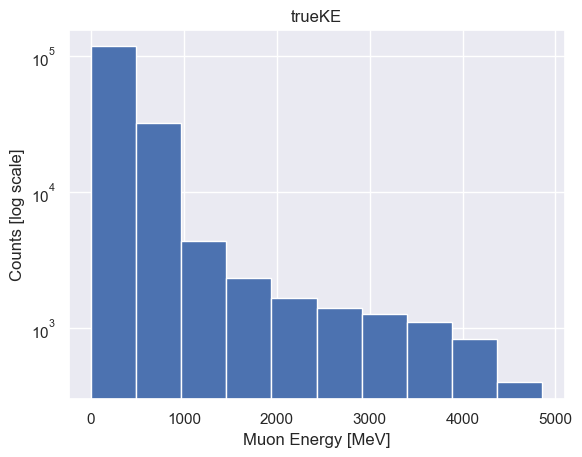

In [6]:
plot_vars = ['total_hits2', 'total_ring_PEs2', 'recoDWallR2', 'recoDWallZ2', 'lambda_max_2', 'trueKE']
x_units = ['(Num. PMT Coincidence Hits)/40,000', '(Num. Cerenkov Hits)/4,500', '(Vertex-Barrel Dist.)/5.5 m', '(Vertex-Endcap Dist.)/12 m',
           '(Est. Muon Track Length)/25 m', 'Muon Energy [MeV]']
count = 0

for label in plot_vars:
    plt.figure()
    plt.hist(df[label])
    plt.yscale('log')
    plt.xlabel(x_units[count])
    plt.ylabel('Counts [log scale]')
    plt.title(label)
    plt.show()
    count += 1

## Exercise 2:

In [7]:
df_2 = df[plot_vars]
df_2.head()

,total_hits2,total_ring_PEs2,recoDWallR2,recoDWallZ2,lambda_max_2,trueKE
0,0.023325,0.00000,0.003389,0.458415,0.650854,236.327
1,0.010075,0.00000,0.003389,0.458415,0.405903,186.765
2,0.080400,0.13070,0.035389,0.753969,0.537975,448.481
3,0.011950,0.00000,0.042498,0.083664,0.830098,586.647
4,0.142300,0.26265,0.616305,0.164307,0.092105,963.822


In [8]:
from sklearn import model_selection

In [9]:
Answer_to_all_questions = 42
input_data = df_2[['total_hits2', 'total_ring_PEs2', 'recoDWallR2', 'recoDWallZ2', 'lambda_max_2']]
target = df_2['trueKE'].values

# train - test split of dataset
train_data , test_data , train_target , test_target = model_selection.train_test_split(input_data , target , test_size =0.3 , 
                                                                                       random_state = Answer_to_all_questions)

print(train_data.shape , train_target.shape , test_data.shape , test_target.shape)

(114514, 5) (114514,) (49078, 5) (49078,)


### (a) Write a function implementing a NN, as we have seen in previous checkpoints. Use a reasonable number of layers and nodes.

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import models

In [11]:
def my_model(num_inputs=5, num_nodes=10, extra_depth=3):
    # create model
    model = Sequential()
    model.add(Dense(num_nodes, input_dim=num_inputs, kernel_initializer='normal',\
                    activation='relu'))
    model.add(Dropout(0.2))
    
    for i in range(extra_depth):
        model.add(Dense(num_nodes, kernel_initializer='normal'))
    
    model.add(Dense(1, kernel_initializer='normal'))       
    model.compile(loss='mean_squared_error', optimizer='adam')
        
    return model

_Implement the usual callback hook that exits the NN optimisation when the classification converges._

In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [13]:
callbacks_ = [
# if we don ’t have an increase of the accuracy for 10 epochs , terminate training
    EarlyStopping(verbose=True , patience=10 , monitor='loss'),
# Always make sure that we ’re saving the model weights with the best accuracy.
    ModelCheckpoint('model.h5', monitor='loss', verbose=0 , save_best_only=True , mode='max')
]

_Demonstrate the good performance by running a cross-validation. Don’t spend too much time optimising the architecture, aim for a R2 score of higher than 70-75%._

In [14]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [15]:
batchSize = 100
N_epochs = 20

Answer_to_all_questions = 42
np.random.seed(Answer_to_all_questions)

In [16]:
from sklearn.pipeline import Pipeline

In [17]:
estimators = []
estimators.append(('mlp', KerasRegressor(build_fn=my_model, epochs=N_epochs, batch_size=batchSize, verbose=1)))
pipeline = Pipeline(estimators)

kfold = KFold(n_splits=10, random_state=Answer_to_all_questions, shuffle=True)
results = cross_val_score(pipeline, train_data, train_target, cv=kfold, fit_params={'mlp__callbacks': callbacks_ }, scoring='r2')

C:\Users\clair\miniconda3\envs\daml\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


Epoch 1/20
1031/1031 [==============================] - 6s 5ms/step - loss: 294001.2500
Epoch 2/20
1031/1031 [==============================] - 5s 4ms/step - loss: 116609.3203
Epoch 3/20
1031/1031 [==============================] - 5s 4ms/step - loss: 113818.5234
Epoch 4/20
1031/1031 [==============================] - 5s 4ms/step - loss: 113348.9062
Epoch 5/20
1031/1031 [==============================] - 5s 4ms/step - loss: 112528.5469
Epoch 6/20
1031/1031 [==============================] - 5s 4ms/step - loss: 111455.6562
Epoch 7/20
1031/1031 [==============================] - 5s 4ms/step - loss: 111001.8984
Epoch 8/20
1031/1031 [==============================] - 5s 4ms/step - loss: 110656.7500
Epoch 9/20
1031/1031 [==============================] - 5s 4ms/step - loss: 109651.1641
Epoch 10/20
1031/1031 [==============================] - 5s 4ms/step - loss: 107212.6953
Epoch 11/20
1031/1031 [==============================] - 5s 4ms/step - loss: 107152.7656
Epoch 12/20
1031/1031 [=======

In [18]:
print('Result : %0.2f %s %0.2f' % (results.mean(), u'\u00B1 ', results.std()))

Result : 0.75 ±  0.01


### (b) Use method fit on the model you have implemented in the function, using the training dataset for the fitting, and the test dataset for validation: validation data = (test data, test target).

In [19]:
model = my_model()

history = model.fit(train_data, train_target, batch_size=100, epochs=20, verbose=1, \
                    validation_data=(test_data, test_target))

Epoch 1/20
1146/1146 [==============================] - 8s 6ms/step - loss: 280849.7500 - val_loss: 103719.9844
Epoch 2/20
1146/1146 [==============================] - 7s 6ms/step - loss: 118588.1641 - val_loss: 103154.1016
Epoch 3/20
1146/1146 [==============================] - 7s 6ms/step - loss: 117504.6562 - val_loss: 103600.1172
Epoch 4/20
1146/1146 [==============================] - 7s 6ms/step - loss: 116668.1172 - val_loss: 101237.3438
Epoch 5/20
1146/1146 [==============================] - 7s 6ms/step - loss: 115136.6328 - val_loss: 100240.9375
Epoch 6/20
1146/1146 [==============================] - 7s 6ms/step - loss: 115816.3906 - val_loss: 99459.5312
Epoch 7/20
1146/1146 [==============================] - 7s 6ms/step - loss: 114215.7891 - val_loss: 98155.1719
Epoch 8/20
1146/1146 [==============================] - 7s 6ms/step - loss: 113323.8594 - val_loss: 97683.5859
Epoch 9/20
1146/1146 [==============================] - 7s 6ms/step - loss: 112832.0859 - val_loss: 96178.2

_Use array History.history[’loss’] to plot the evolution of the loss-function (y-axis in log-scale) as a function of the epoch. You may use function nn utils.lossplot or write your own._

In [20]:
epochs = np.arange(20)
loss = history.history['loss']

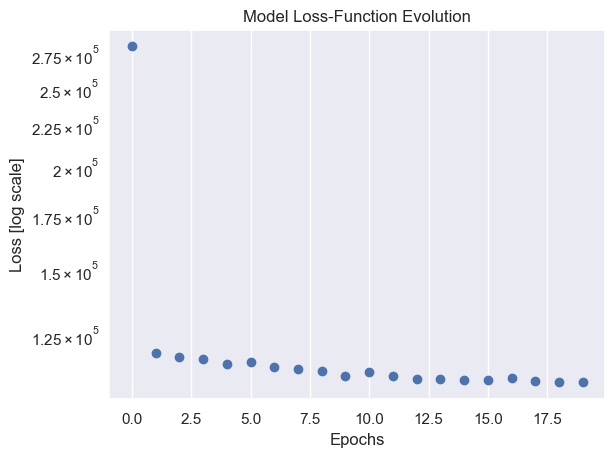

In [21]:
plt.figure()
plt.scatter(epochs, loss)
plt.ylabel('Loss [log scale]')
plt.xlabel('Epochs')
plt.title('Model Loss-Function Evolution')
plt.yscale('log')
plt.show()

_Use method predict to get an array of predicted muon-energy values using test data. Compare it with test target by creating a “predicted” (y-axis) vs. “actual” (x-axis) scatter plot of muon energy values._

In [22]:
from sklearn.model_selection import cross_val_predict

In [23]:
predicted = cross_val_predict(pipeline, test_data, test_target, cv=kfold)

Epoch 1/20
442/442 [==============================] - 3s 5ms/step - loss: 451297.8125
Epoch 2/20
442/442 [==============================] - 2s 5ms/step - loss: 185871.8594
Epoch 3/20
442/442 [==============================] - 2s 5ms/step - loss: 121510.8359
Epoch 4/20
442/442 [==============================] - 2s 5ms/step - loss: 115959.3203
Epoch 5/20
442/442 [==============================] - 2s 5ms/step - loss: 113123.7500
Epoch 6/20
442/442 [==============================] - 2s 5ms/step - loss: 113053.0859
Epoch 7/20
442/442 [==============================] - 2s 5ms/step - loss: 112506.1641
Epoch 8/20
442/442 [==============================] - 2s 5ms/step - loss: 112719.8672
Epoch 9/20
442/442 [==============================] - 2s 5ms/step - loss: 111118.7812
Epoch 10/20
442/442 [==============================] - 2s 5ms/step - loss: 112343.5781
Epoch 11/20
442/442 [==============================] - 2s 5ms/step - loss: 111909.8906
Epoch 12/20
442/442 [==============================]

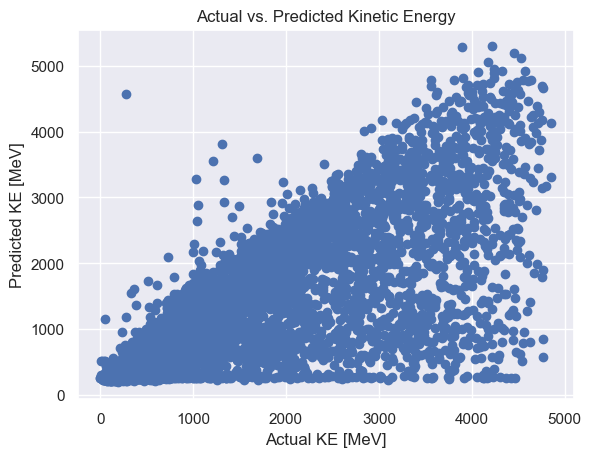

In [24]:
plt.figure()
plt.scatter(x=test_target, y=predicted)
plt.ylabel('Predicted KE [MeV]')
plt.xlabel('Actual KE [MeV]')
plt.title('Actual vs. Predicted Kinetic Energy')
plt.show()

## Exercise 3

### (a) Try to get a quick result by using a GBRT with the default parameters.

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [26]:
gbr0 = GradientBoostingRegressor(n_estimators=100)
gbr0.fit(train_data, train_target.ravel())

GradientBoostingRegressor()

_Use method GradientBoostingRegressor.score to get two R2 scores, one for the training and one for the test datasets. If these two numbers differ significantly, you are probably suffering from overfitting._  

_How do these scores compare with the performance you got for the NN regressor?_

In [27]:
print('Train data R2 score:', gbr0.score(train_data, train_target))
print('Test data R2 score:', gbr0.score(test_data, test_target))

Train data R2 score: 0.7830727956686763
Test data R2 score: 0.781797050479113


The neural network regressor yielded an R2 score of 0.75, so the GBRT R2 scores improved upon that result by about 3%. The GBRT R2 scores for the train and test datasets were very similar, so little overfitting occured.

### (b) We will be now doing a proper optimisation by using a grid-search of the regressor parameters and cross-validation in order to identify the optimal regressor. Use the syntax below to feed the regressor with sets of various parameter values.

Hint: this can result into a slow optimisation (e.g. up to 1-2 hours, or more). Play with a small number of values for the parameter grid first, then slowly work your way towards an optimal point. Make sure the machine you are running on can handle n jobs > 1 before starting the optimisation. You may also want to use the newer class HalvingGridSearchCV instead of GridSearchCV.

In [28]:
# requirements for HalvingGridSearchCV from sklearn documentation
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV

class sklearn.model_selection.HalvingGridSearchCV(estimator, param_grid, *, factor=3, resource='n_samples', max_resources='auto', min_resources='exhaust', aggressive_elimination=False, cv=5, scoring=None, refit=True, error_score=nan, return_train_score=True, random_state=None, n_jobs=None, verbose=0)

_Test Run:_

In [29]:
#param_grid_ = {'n_estimators': [100],
#               'learning_rate': [0.1, 0.05],
#               'max_depth': [5, 10],
#               'min_samples_leaf': [50, 100]
#              }

param_grid_ = {'n_estimators': [10],
               'learning_rate': [0.1, 0.05],
               'max_depth': [5, 10],
               'min_samples_leaf': [50, 100]
              }

njobs_ = 3 # jobs to run in parallel
np.random.seed(Answer_to_all_questions)

gbr = GradientBoostingRegressor()
# classifier = GridSearchCV(estimator=gbr, cv=kfold, param_grid=param_grid_, n_jobs=njobs_ , verbose=1)
classifier = HalvingGridSearchCV(estimator=gbr, param_grid=param_grid_, n_jobs=njobs_, verbose=1)
classifier.fit(train_data, train_target.ravel())

print("Best estimator:")
print(classifier.best_estimator_)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 38171
max_resources_: 114514
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 8
n_resources: 38171
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 1
n_candidates: 3
n_resources: 114513
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best estimator:
GradientBoostingRegressor(max_depth=10, min_samples_leaf=50, n_estimators=10)


_Full Run:_

In [30]:
param_grid_ = {'n_estimators': [100],
               'learning_rate': [0.1, 0.05],
               'max_depth': [5, 10],
               'min_samples_leaf': [50, 100]
              }

njobs_ = 8 # jobs to run in parallel
np.random.seed(Answer_to_all_questions)

gbr = GradientBoostingRegressor()

classifier = HalvingGridSearchCV(estimator=gbr, param_grid=param_grid_, n_jobs=njobs_, verbose=1)
classifier.fit(train_data, train_target.ravel())

print("Best estimator:")
print(classifier.best_estimator_)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 38171
max_resources_: 114514
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 8
n_resources: 38171
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 1
n_candidates: 3
n_resources: 114513
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best estimator:
GradientBoostingRegressor(learning_rate=0.05, max_depth=10, min_samples_leaf=50)


_Use function nn_utils.plot_learning_curve to plot the performance of the optimised regressor (classifier.best\_estimator\_) for the training and the test datasets_

In [31]:
from sklearn.model_selection import learning_curve

In [32]:
from scikitplot.estimators import plot_learning_curve

<AxesSubplot:title={'center':'Best Estimator Learning Curve (train data)'}, xlabel='Training examples', ylabel='Score'>

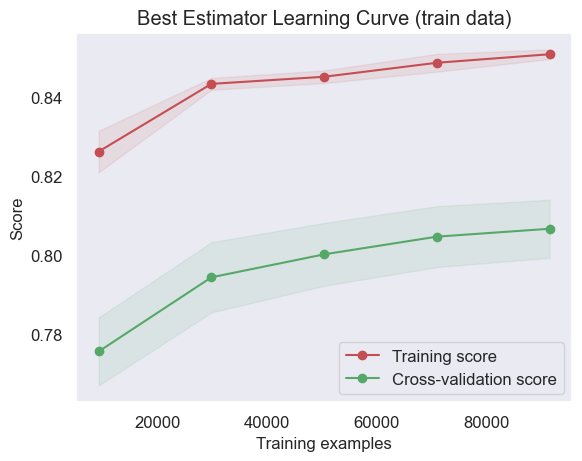

In [37]:
plot_learning_curve(classifier.best_estimator_, train_data, train_target, title="Best Estimator Learning Curve (train data)")

<AxesSubplot:title={'center':'Best Estimator Learning Curve (test data)'}, xlabel='Training examples', ylabel='Score'>

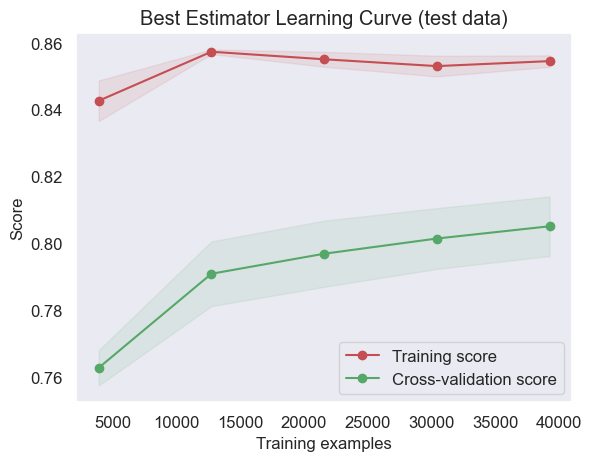

In [36]:
plot_learning_curve(classifier.best_estimator_, test_data, test_target, title="Best Estimator Learning Curve (test data)")

### (c) Create a new GBRT regressor with the parameters as determined by classifier.best_estimator_. Run method cross_val_score on the test dataset and cross-validation, and determine the R^2 score with its standard deviation.

In [34]:
gbr1 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=10, min_samples_leaf=50)

results_2 = cross_val_score(pipeline, test_data, test_target, cv=kfold, fit_params={'mlp__callbacks': callbacks_ }, scoring='r2')

Epoch 1/20
442/442 [==============================] - 1s 2ms/step - loss: 453134.4375
Epoch 2/20
442/442 [==============================] - 1s 1ms/step - loss: 198128.8594
Epoch 3/20
442/442 [==============================] - 1s 1ms/step - loss: 118584.0547
Epoch 4/20
442/442 [==============================] - 1s 1ms/step - loss: 113836.0547
Epoch 5/20
442/442 [==============================] - 1s 1ms/step - loss: 113105.9141
Epoch 6/20
442/442 [==============================] - 1s 2ms/step - loss: 115156.4766
Epoch 7/20
442/442 [==============================] - 1s 2ms/step - loss: 114382.5938
Epoch 8/20
442/442 [==============================] - 1s 2ms/step - loss: 113335.8516
Epoch 9/20
442/442 [==============================] - 1s 2ms/step - loss: 113563.2578
Epoch 10/20
442/442 [==============================] - 1s 1ms/step - loss: 110611.3594
Epoch 11/20
442/442 [==============================] - 1s 2ms/step - loss: 112136.0781
Epoch 12/20
442/442 [==============================]

In [35]:
print('Result : %0.2f %s %0.2f' % (results_2.mean(), u'\u00B1 ', results_2.std()))

Result : 0.74 ±  0.02
